# Time series analysis

In [77]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [79]:
df.shape

(645675, 5)

In [80]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [81]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [82]:
df=df.dropna(how='any',axis=0)
df.shape

(620027, 5)

# Rename columns

In [83]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_Temp',\
                   'AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

In [84]:
df.columns

Index(['Date', 'Avg_Temp', 'confidence_interval_temp', 'State', 'Country'], dtype='object')

# setting date as index column

In [85]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [86]:
df.describe()

,Avg_Temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


# creating year column from Date column

In [87]:
df['Year']=df.index.year
df.head()

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


# selecting year range

In [88]:
#new_df = df[(df['Date'] > '1980-01-01') & (df['Date'] <= '2013-12-31')]
latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


# Let's find country temperature average

In [89]:
latest_df[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [90]:
#plt.figure(figsize=(9,4))
#sns.lineplot(x='Year',y='Avg_Temp',data=latest_df)
#plt.show()

# Resampling data annualy to get distinct line

In [91]:
resample_df=latest_df[['Avg_Temp']].resample('A').mean()
resample_df.head()

,Avg_Temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


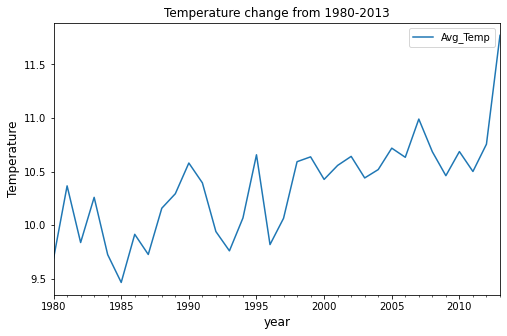

In [92]:
resample_df.plot(title='Temperature change from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.legend()

# Apply Dickey–Fuller test

In [93]:
from statsmodels.tsa.stattools import adfuller
print('Dicky Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
for key,value in test_df[4].items():
                    df_output['Critical Value(%s)' %key]=value
                    
print(df_output)

Dicky Fuller Test Results:
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64


### Here test statistic is greater than the critical values.so we failed to reject the nulll hypothesis.This implies time series is not stationary. So we decompose data and compare with seasonal, original data and trend data

In [94]:
decomp = seasonal_decompose(resample_df,freq=3)

trend= decomp.trend
seasonal =decomp.seasonal
residual=decomp.resid


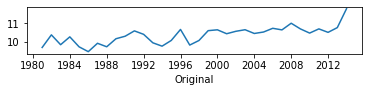

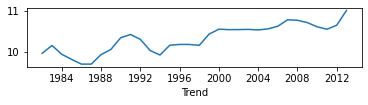

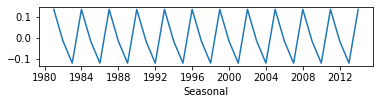

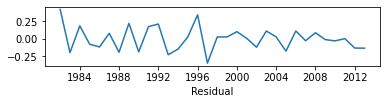

<Figure size 432x360 with 0 Axes>

In [95]:
#Plot original time series
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

#plot trend line
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

#plot seasonal
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

#plot residual
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

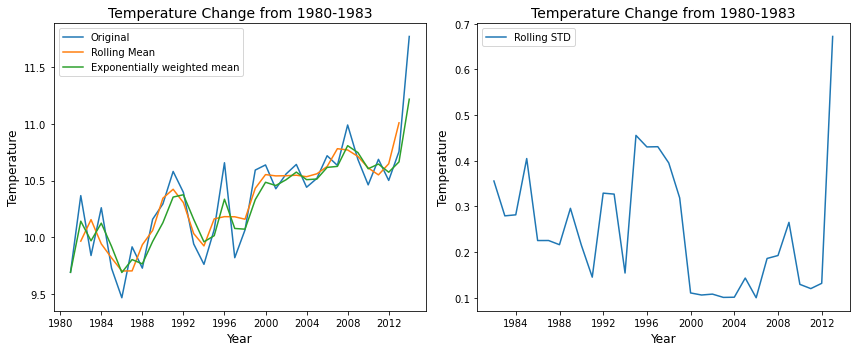

In [98]:
# Transforming data using 

rol_mean =resample_df.rolling(window=3,center=True).mean()

ewm = resample_df.ewm(span=3).mean() #exponential weighted mean

rol_std = resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#temp graph with rolling meand and exponentially weighted mean

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially weighted mean')
ax1.set_title('Temperature Change from 1980-1983',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

#temp graph with rolling meand and exponentially weighted mean

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Change from 1980-1983',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


# Apply again Dicki Fuller Test

In [106]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dicky Fuller Test for rolling mean:')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],\
                    index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
for key,value in df_test[4].items():
                    df_output['Critical Value(%s)' %key]=value
print(df_output)
                    
print('')
print('Dickey-Fuller Test for the exponentially weighted mean:')
df_test = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],\
                    index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
for key,value in df_test[4].items():
                    df_output['Critical Value(%s)' %key]=value
        
print(df_output)

Dicky Fuller Test for rolling mean:
Test Statistic                  0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of observations Used    23.000000
Critical Value(1%)             -3.752928
Critical Value(5%)             -2.998500
Critical Value(10%)            -2.638967
dtype: float64

Dickey-Fuller Test for the exponentially weighted mean:
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of observations Used    31.000000
Critical Value(1%)             -3.661429
Critical Value(5%)             -2.960525
Critical Value(10%)            -2.619319
dtype: float64


# Here both the test are greater than the critical values. so we failed to reject null hypothesis.

In [101]:
diff_rol_mean = resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_Temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [102]:
diff_ewm = resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_Temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


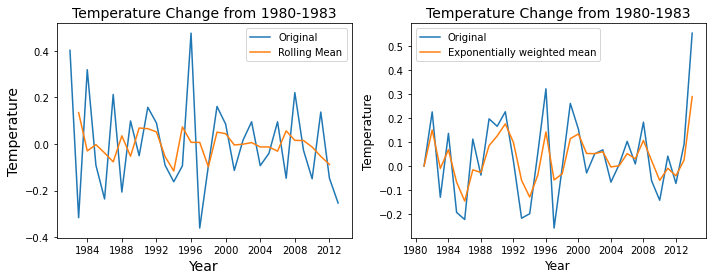

In [105]:
df_rol_mean_diff =diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean() #exponential weighted mean

rol_std = resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

#temp graph with rolling meand and exponentially weighted mean

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Change from 1980-1983',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=14)
ax1.set_xlabel('Year',fontsize=14)
ax1.legend()

#temp graph with rolling meand and exponentially weighted mean

ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label='Exponentially weighted mean')
ax2.set_title('Temperature Change from 1980-1983',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

# Apply Dickey-Fuller Test again

In [107]:
print('Dicky Fuller Test for difference between original and rolling mean:')
df_test = adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],\
                    index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
for key,value in df_test[4].items():
                    df_output['Critical Value(%s)' %key]=value
print(df_output)
                    
print('')
print('Dickey-Fuller Test for difference between original and the exponentially weighted mean:')
df_test = adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],\
                    index=['Test Statistic','p-value','Lags Used','Number of observations Used'])
for key,value in df_test[4].items():
                    df_output['Critical Value(%s)' %key]=value
        
print(df_output)

Dicky Fuller Test for difference between original and rolling mean:
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
Lags Used                      1.000000e+00
Number of observations Used    3.000000e+01
Critical Value(1%)            -3.669920e+00
Critical Value(5%)            -2.964071e+00
Critical Value(10%)           -2.621171e+00
dtype: float64

Dickey-Fuller Test for difference between original and the exponentially weighted mean:
Test Statistic                 -4.297446
p-value                         0.000449
Lags Used                       1.000000
Number of observations Used    32.000000
Critical Value(1%)             -3.653520
Critical Value(5%)             -2.957219
Critical Value(10%)            -2.617588
dtype: float64


# *Here critical values is less than critical values for both rolling mean and exponentially weighted mean.*

In [108]:
# we can reject null hypothesis. and we are confident at this point.

In [110]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

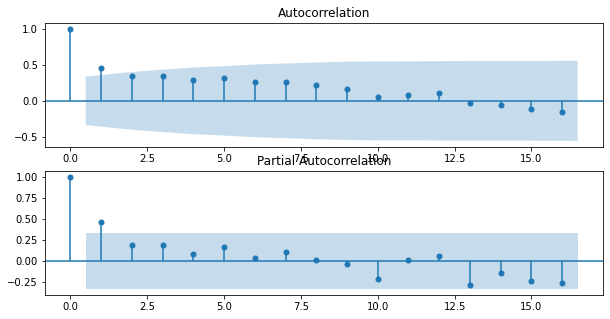

In [111]:
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()

p parameter is first value in partial autocorrelation graph which is significantly different than previous values

q in the autocorrelation graph first value and it could be zero.
d parameter is difference.